In [100]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


try:
    raw=pd.read_csv(r"C:\Users\pc\Desktop\Data coll\Week 1\raw_analyst_ratings.csv")
    print("Loaded successfully")
except:
    print("Try again")   

print("Hello")

Loaded successfully
Hello


In [20]:
raw.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [26]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1048575 non-null  int64 
 1   headline    1048575 non-null  object
 2   url         1048575 non-null  object
 3   publisher   1048575 non-null  object
 4   date        1048575 non-null  object
 5   stock       1048575 non-null  object
dtypes: int64(1), object(5)
memory usage: 48.0+ MB


In [57]:
raw['date'] = pd.to_datetime(raw['date'], errors='coerce')

In [28]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype                    
---  ------      --------------    -----                    
 0   Unnamed: 0  1048575 non-null  int64                    
 1   headline    1048575 non-null  object                   
 2   url         1048575 non-null  object                   
 3   publisher   1048575 non-null  object                   
 4   date        41473 non-null    datetime64[ns, UTC-04:00]
 5   stock       1048575 non-null  object                   
dtypes: datetime64[ns, UTC-04:00](1), int64(1), object(4)
memory usage: 48.0+ MB


In [29]:
raw=raw.dropna()

In [41]:
raw.to_csv('clean_data.csv', index=False)

In [101]:


try:
    rw=pd.read_csv(r"C:\Users\pc\Predicting-Price-Moves-with-News-Sentiment\task1\clean_data.csv")
    print("Loaded successfully")
except:
    print("Try again")   

Loaded successfully


In [102]:
rw['date'] = pd.to_datetime(rw['date'], errors='coerce')

In [72]:
#length of each headline in headline_length new col
rw['headline_length'] = rw['headline'].apply(len)

In [73]:
#statistics for the headline lengths
statistics = rw['headline_length'].describe()
statistics

count    41473.000000
mean        79.649555
std         55.670238
min         15.000000
25%         42.000000
50%         62.000000
75%         91.000000
max        512.000000
Name: headline_length, dtype: float64

In [74]:
rw.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,year,month,day,weekday
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,2020,6,5,Friday
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,2020,6,3,Wednesday
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,2020,5,26,Tuesday
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,2020,5,22,Friday
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,2020,5,22,Friday


In [75]:
print(rw['publisher'].value_counts())

publisher
Benzinga Newsdesk    11174
Lisa Levin            9412
ETF Professor         3184
Paul Quintaro         3035
Benzinga Newsdesk     2298
                     ...  
Tim Melvin               1
Ritesh Anan              1
Sam Liu                  1
Ken Shreve               1
Aaron Jackson.Ed         1
Name: count, Length: 203, dtype: int64


In [76]:
rw['year'] = rw['date'].dt.year
rw['month'] = rw['date'].dt.month
rw['day'] = rw['date'].dt.day
rw['weekday'] = rw['date'].dt.day_name()

In [77]:
daily_counts =rw['date'].value_counts().sort_index()
daily_counts.describe()

count    27314.000000
mean         1.518379
std          5.962296
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        668.000000
Name: count, dtype: float64

In [78]:
weekday_counts = rw['weekday'].value_counts().loc[
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
]
weekday_counts.describe()

count       7.000000
mean     5924.714286
std      3946.929301
min       208.000000
25%      3612.000000
50%      7746.000000
75%      8415.500000
max      9464.000000
Name: count, dtype: float64

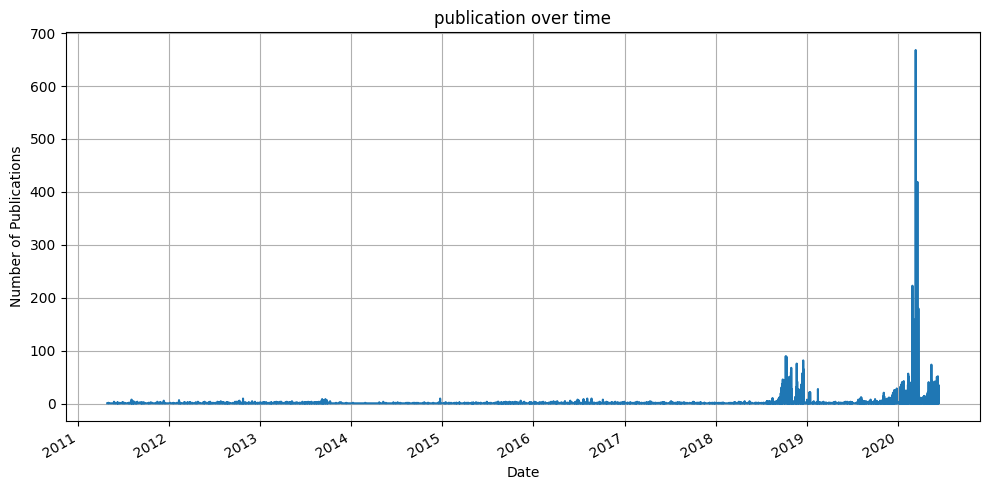

In [79]:
daily_counts.plot(kind='line', title='publication over time', figsize=(10, 5))
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.grid(True)
plt.tight_layout()
plt.show()

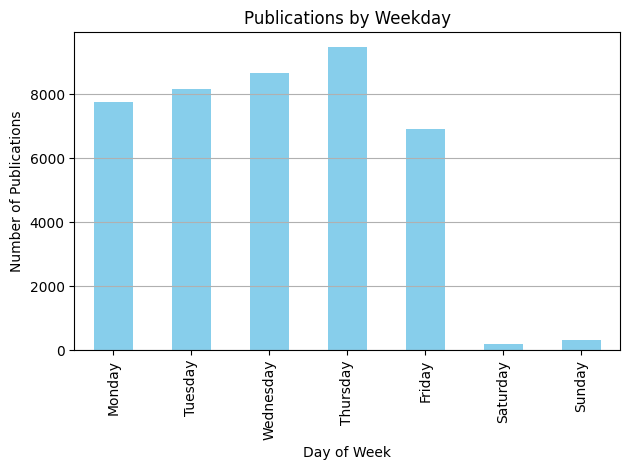

In [80]:
weekday_counts.plot(kind='bar', title='Publications by Weekday', color='skyblue')
plt.xlabel('Day of Week')
plt.ylabel('Number of Publications')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [39]:
raw.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,year,month,day,weekday
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,2020,6,5,Friday
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,2020,6,3,Wednesday
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,2020,5,26,Tuesday
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,2020,5,22,Friday
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,2020,5,22,Friday


In [81]:
rw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41473 entries, 0 to 41472
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype                    
---  ------           --------------  -----                    
 0   Unnamed: 0       41473 non-null  int64                    
 1   headline         41473 non-null  object                   
 2   url              41473 non-null  object                   
 3   publisher        41473 non-null  object                   
 4   date             41473 non-null  datetime64[ns, UTC-04:00]
 5   stock            41473 non-null  object                   
 6   headline_length  41473 non-null  int64                    
 7   year             41473 non-null  int32                    
 8   month            41473 non-null  int32                    
 9   day              41473 non-null  int32                    
 10  weekday          41473 non-null  object                   
dtypes: datetime64[ns, UTC-04:00](1), int32(3), int64(2), o

In [ ]:
# Count headlines per day
daily_headlines = rw.groupby('date').size()

# Create a DataFrame for time series analysis
time_series_data = pd.DataFrame({'date': daily_headlines.index, 'Headlines_Count': daily_headlines.values})
time_series_data.set_index('date', inplace=True)

In [88]:
time_series_data

,Headlines_Count
date,
2011-04-27 21:01:48-04:00,1
2011-04-28 13:49:29-04:00,1
2011-04-28 15:00:36-04:00,1
2011-04-29 13:47:06-04:00,1
2011-04-29 16:11:05-04:00,1
...,...
2020-06-11 16:15:38-04:00,1
2020-06-11 16:24:41-04:00,1
2020-06-11 16:25:21-04:00,1


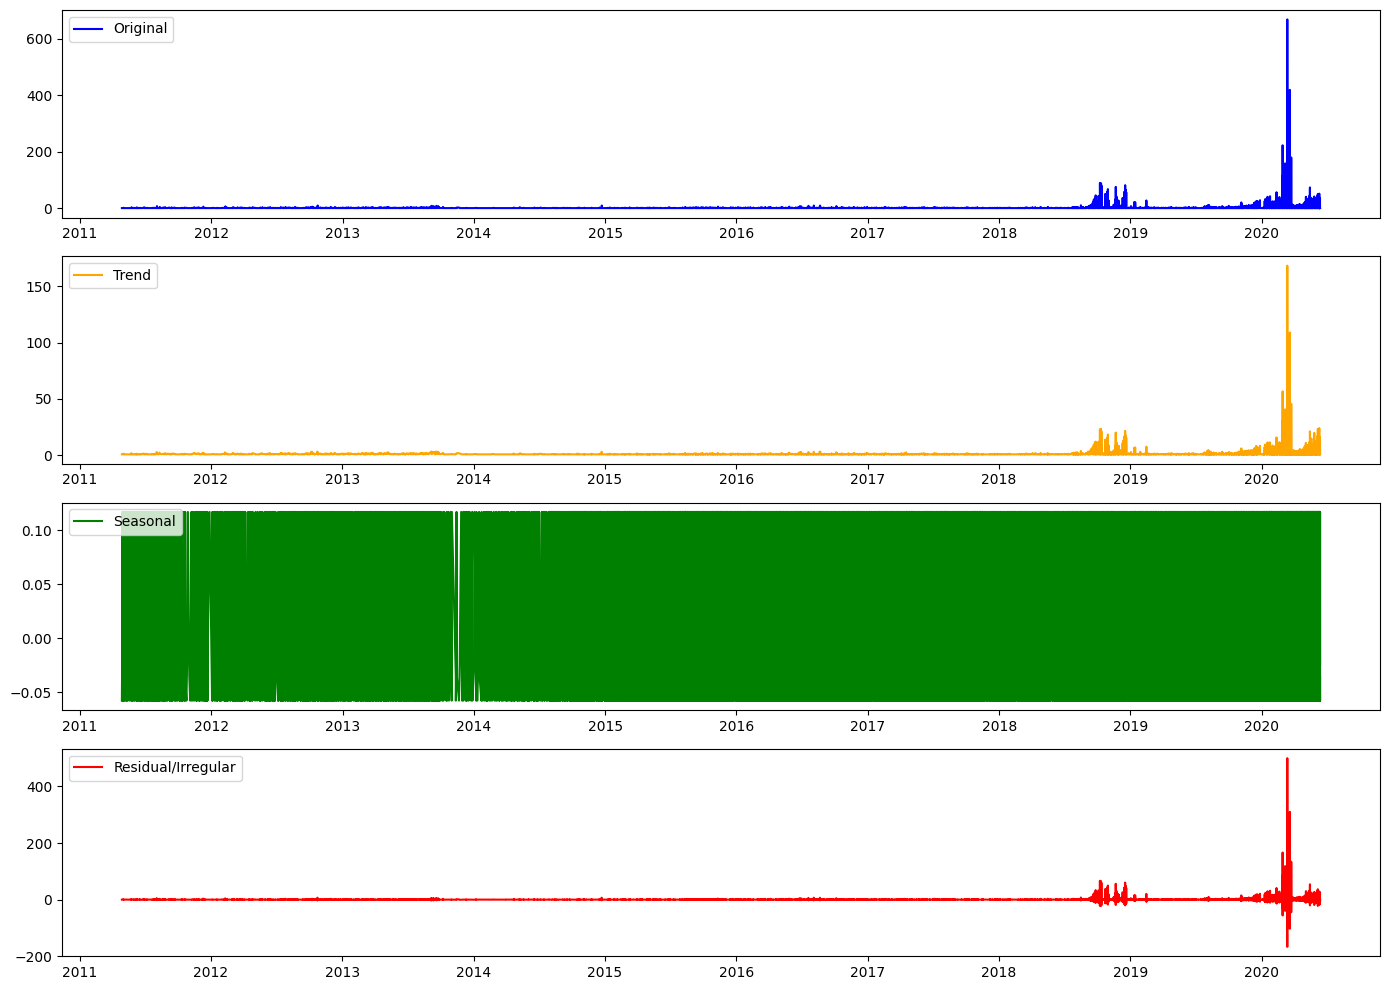

In [94]:
decomposition = seasonal_decompose(time_series_data['Headlines_Count'], model='additive', period=4)

# Plotting the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(time_series_data['Headlines_Count'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [96]:
#number of unique headlines
print(rw['headline'].nunique())

25668


In [97]:
#most frequent headlines
print(rw['headline'].value_counts().head())

headline
Stocks That Hit 52-Week Lows On Thursday      1391
Stocks That Hit 52-Week Lows On Friday         538
Stocks That Hit 52-Week Highs On Friday        413
Stocks That Hit 52-Week Highs On Tuesday       400
Stocks That Hit 52-Week Highs On Wednesday     369
Name: count, dtype: int64


In [106]:
def calculate_sentiment(text): 
    return TextBlob(text).sentiment.polarity
 
#Applying the sentiment analysis function to your headlines 
rw['Sentiment']= rw["headline"].apply(calculate_sentiment)

In [107]:
print(rw['Sentiment'].describe())

count    41473.000000
mean         0.039001
std          0.153338
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.022321
max          1.000000
Name: Sentiment, dtype: float64


In [108]:
print(rw['Sentiment'].value_counts().head())

Sentiment
 0.000000    27526
 0.500000     1459
 0.068182     1424
 0.250000      895
-0.155556      590
Name: count, dtype: int64


In [109]:
print(rw['Sentiment'].nunique())

773


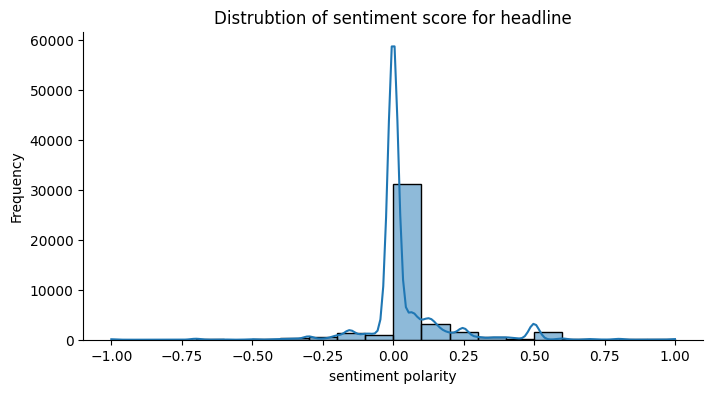

In [113]:
#plot distribution of sentiment score
plt.figure(figsize=(8,4))
sns.histplot(rw['Sentiment'], bins=20, kde=True)
plt.title("Distrubtion of sentiment score for headline")
plt.xlabel('sentiment polarity')
plt.ylabel("Frequency")
plt.gca().spines[['top','right']].set_visible(False)
plt.show()

In [117]:
most_positive_headlines=rw.nlargest(5,'Sentiment')
print("\nmost postive headlines")
print(most_positive_headlines)




most postive headlines
      Unnamed: 0                                           headline  \
149         7754  'Great work @AtlasAirWW, thank you!' -Trump In...   
2169       67109  Lansdowne Partners Austria GmbH in Amended 13D...   
3352       92992  Bitcoin, China, And AI Highlight Some Of The Y...   
3369       93066  Bitcoin, China, And AI Highlight Some Of The Y...   
4758      131077  BEST Inc. Amended 13D Filing From Alibaba Show...   

                                                    url          publisher  \
149   https://www.benzinga.com/news/20/03/15711304/g...  Benzinga Newsdesk   
2169  https://www.benzinga.com/news/16/06/8119221/la...      Charles Gross   
3352  https://www.benzinga.com/fintech/17/12/1096101...      ETF Professor   
3369  https://www.benzinga.com/fintech/17/12/1096101...      ETF Professor   
4758  https://www.benzinga.com/news/20/06/16168614/b...  Benzinga Newsdesk   

                          date stock  headline_length  year  month  day  \
149  

In [118]:
most_negative_headlines=rw.nsmallest(5, 'Sentiment')
print("\nmost negative headlines")
print(most_negative_headlines)


most negative headlines
      Unnamed: 0                                           headline  \
748        21949  Worst Performing Industries For September 9, 2015   
2173       67113     Worst Performing Industries For April 26, 2016   
2277       70273      Worst Performing Industries For July 18, 2016   
2968       84395  Mizuho Upgrades Occidental Petroleum, Says Wor...   
3018       86546  Worst Performing Industries For December 10, 2014   

                                                    url    publisher  \
748   https://www.benzinga.com/news/15/09/5825362/wo...   Lisa Levin   
2173  https://www.benzinga.com/news/16/04/7884844/wo...   Lisa Levin   
2277  https://www.benzinga.com/news/16/07/8227811/wo...   Lisa Levin   
2968  https://www.benzinga.com/analyst-ratings/analy...  Priya Nigam   
3018  https://www.benzinga.com/news/14/12/5071407/wo...   Lisa Levin   

                          date stock  headline_length  year  month  day  \
748  2015-09-09 12:35:24-04:00  ADAT    